---
title: tensorflow教程01-神经网络模型通俗理解和简单案例
date: 2018-06-20 20:17:55
tags: [tensorflow教程, 深度学习]
toc: true
xiongzhang: true
mathjax: true

---
<span></span>
<!-- more -->

> 声明: 本文由[DataScience](http://mlln.cn)原创发表, 转载请注明[本文链接](http://mlln.cn)mlln.cn, 并在文后留言`转载`.

本文代码运行环境:

- windows10
- python3.6
- jupyter notebook
- tensorflow 1.x

### 什么是人工神经网络

首先必须澄清, 人工神经网络和生物神经网络没有必然关系, 只是人类为了通俗理解而作的一个比喻. 这不是我的观点, 是吴恩达在他的深度学习课程中多次重申的.

人工神经网络(后文简称神经网络)由很多神经元相互链接构成一个网络, 而所谓的链接其实就是计算路径, 所以, 神经网络可以看成是一个计算图, 神经元就是一个计算, 链接神经元的边就是数据流通的路径. 下图是一个经典的神经网络. 圆圈代表神经元, 边代表计算路径.

<img src="images/nn.png" />

通常我们把一个神经网络分为三层: 输入层, 隐藏层和输出层. 输入层其实就是你的输入的数据, 比如, 我们现在有个向量`X=[1,2,3]`, X的每个元素可以当作输入层神经元的激活值, 比如第一个神经元的激活值是1, 第二个神经元的激活值是2. 

得到了输入层的激活值, 我们接着计算隐藏层的激活值, 如果你懂得点线性代数, 你可以用矩阵的运算得到隐层的激活向量$A_1$:

$$
A_1 = sigmoid(W_1  X)
$$

$W_1$代表的是输入层和隐藏层之间每个神经元两两连接的线的权重, $A_1$表示图中的$[a_4, a_5, a_6, a_7]$, $sigmoid$表示激活函数, 它就是一个函数, 如果不知道可以先不理会. 从上图中, 你可以看出, $W_1$的形状是 4x3, 因为隐层是4个神经元, 输入层是3个神经元. 如果你没有学过线性代数, 那么你学习机器学习还是很有难度的, 但是没关系, 我这里列出计算隐层第一个神经元激活量$a_4$的公式:

$$
a_4 = sigmoid(x_1 * a_{41} + x_2 * a_{42} + a_{43})
$$

这个公式里都是实数运算, 不涉及任何的矩阵运算. 到此, 我们就得到了隐藏层的激活量. 然后才能计算输出层的激活量, 算法和之前是一样的.

$$
\hat Y = sigmoid(W_2 A_1)
$$

$ \hat Y$就表示图中的$[y_1, y_2]$, 也就是输出层每个神经元的激活量. 注意我们通常用$\hat Y$表示神经网络的计算所得值, 而用$Y$表示正确答案, 也即是训练数据.

假如我们的任务是用以上神经网络判断一个像素点是红色还是绿色, 我们的Y的两个元素的值就是两种颜色的概率. 输入的X就是像素点的三个通道值.

### 神经网络如何进行学习

神经网络中可变的量就是上面提到的权重$W_1$和$W_2$, 后面我们统称为$W$, 当然不同的神经网络架构还会有不同的参数, 但是为了简便起见, 我们暂时只使用权重. 有过小学经验的你应该可以知道, 通过改变$W$的值就能改变输出层的激活量Y. 神经网络科学家的任务就是通过让机器学习已经准备好的训练数据, 找到最佳的W值, 让神经网络的计算结果$\hat Y$尽量接近训练数据$Y$. 

所以所谓的学习, 就指的是调整W的数值, 以便降低$\hat Y$的错误率. 那如何调整W? 常用的方法就是梯度下降法, 但是如果你不想学习这些优化方法, 也并不影响你使用神经网络算法. 我这里提到它, 但并不打算讲它, 只是告诉你, 我们的确有方法去调整W以便达到我们的目的. 而Tensorflow已经为我们写好了这些方法, 我们只需要调用这些方法即可.

### 世界上最简单的一个神经网络

下面我们就用代码来实现一个简单的神经网络, 它只有两层(输入和输出), 一个神经元.

<img src="images/single-nn.png" />

引入用到的库

In [4]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [6]:
# 输入值, 只是一个实数
input_value = tf.constant(0.5, name="input_value")

# 权重, 它时一个可变量, 用Variable
weight = tf.Variable(1.0,name="weight") 

# 期望的输出值, 也就是正确答案
expected_output = tf.constant(0.0,name="expected_output")

# 计算输出值, 其实就是简单的相乘, 
output = input_value * weight


计算损失值, 也就是衡量模型好坏的指标, 其实就是$Y$和$\hat Y$每个元素的差的平方和. 也即是expected_output与output之间的差值的平方和.

In [7]:
loss = (expected_output - output) ** 2

设置优化方法, 我们就用最普通的梯度下降法即可, 目标是让loss最小化, loss越小表示神经网络的计算所得与期望所得越接近.

In [8]:
optimizer = tf.train.GradientDescentOptimizer(0.025).minimize(loss)


训练模型, 让权重weight调整大小, 以便于让输出值output接近0, 总共学习100次:

In [35]:
%matplotlib inline
sess.run(tf.global_variables_initializer())
losses = []
outputs = []
for i in range(200):
    losses.append(loss.eval())
    outputs.append(output.eval())
    sess.run(optimizer)

print('最后的预测值:', output.eval())
print('最后的loss:', loss.eval())




最后的预测值: 0.04040089
最后的loss: 0.0016322319


可视化训练过程:

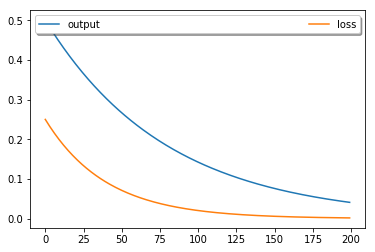

In [34]:
import matplotlib.pyplot as plt
plt.plot(outputs, label='output')
plt.plot(losses, label='loss')
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
plt.show()

### 总结

通过上面的例子你应该可以知道机器学习的本质--调整权重(参数)以便于让输出结果靠近我们的期望结果. 而且你也看到了, 机器是能够调整参数的.